In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-digit-recognizer/train.csv


In [45]:
df = pd.read_csv('/kaggle/input/mnist-digit-recognizer/train.csv')

In [46]:
df.shape

(42000, 785)

In [47]:
df.sample(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
26689,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31457,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30824,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2919,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22388,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27619,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23536,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
import matplotlib.pyplot as plt

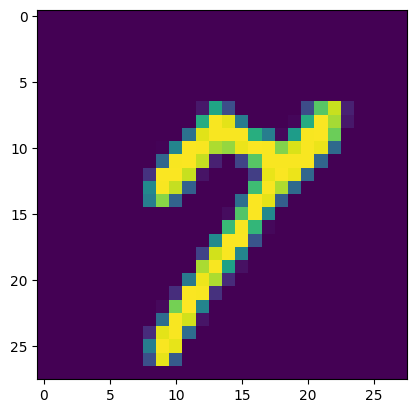

In [49]:
plt.imshow(df.iloc[18018,1:].values.reshape(28,28))

In [50]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [51]:
from sklearn.model_selection import train_test_split 
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [52]:
X_train.shape

(33600, 784)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier()

In [55]:
knn.fit(X_train , y_train )

KNeighborsClassifier()

In [56]:
import time
start =time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)

13.238669872283936


In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [60]:
X_tain = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

PCA

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [64]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [65]:
X_train_trf.shape

(33600, 200)

In [66]:
knn = KNeighborsClassifier()

In [67]:
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [68]:
y_pred = knn.predict(X_test_trf)

In [70]:
accuracy_score(y_test, y_pred)

0.10821428571428572

In [85]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    a=accuracy_score(y_test,y_pred)



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


KeyboardInterrupt: 

In [84]:
# Create (index, accuracy) pairs from the list
acc_with_index = list(enumerate(acc, start=1))

# Sort and get top 5
top5 = sorted(acc_with_index, key=lambda x: x[1], reverse=True)[:5]

# Print the top 5
print("Top 5 PCA component counts with their accuracies:")
for components, accuracy in top5:
    print(f"n_components = {components}, Accuracy = {accuracy*100}")


Top 5 PCA component counts with their accuracies:
n_components = 3, Accuracy = 14.892857142857144
n_components = 4, Accuracy = 12.178571428571429
n_components = 1, Accuracy = 11.630952380952381
n_components = 5, Accuracy = 10.821428571428573
n_components = 6, Accuracy = 10.821428571428573


In [86]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [88]:
X_train_trf.shape

(33600, 2)

In [89]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()